In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score , r2_score , mean_squared_error , mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('/content/hypertension_dataset.csv')


In [ ]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,1,1,0,1
1,32,11.7,10,1,5.4,23.4,0,1,0,0
2,78,9.5,3,1,7.1,18.7,0,2,0,0
3,38,10.0,10,0,4.2,22.1,0,1,0,1
4,41,9.8,1,2,5.8,16.2,0,2,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   int64  
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Family_History    1985 non-null   int64  
 7   Exercise_Level    1985 non-null   int64  
 8   Smoking_Status    1985 non-null   int64  
 9   Has_Hypertension  1985 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 155.2 KB


In [ ]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [ ]:
df['Has_Hypertension'].value_counts()

,count
Has_Hypertension,
1,1032
0,953


In [ ]:
df.nunique()

,0
Age,67
Salt_Intake,121
Stress_Score,11
BP_History,3
Sleep_Duration,88
BMI,236
Family_History,2
Exercise_Level,3
Smoking_Status,2
Has_Hypertension,2


In [ ]:
df.isna().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Family_History,0
Exercise_Level,0
Smoking_Status,0
Has_Hypertension,0


In [ ]:
df.drop('Medication', inplace =True , axis =1 )

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Family_History    1985 non-null   object 
 7   Exercise_Level    1985 non-null   object 
 8   Smoking_Status    1985 non-null   object 
 9   Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 155.2+ KB


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

rows = math.ceil(len(num_cols) / 3)

fig = make_subplots(
    rows=rows,
    cols=3,
    subplot_titles=num_cols
)


for i, col in enumerate(num_cols, 1):
    row = math.ceil(i / 3)
    col_pos = (i - 1) % 3 + 1
    fig.add_trace(
        go.Box(y=df[col], name=col),
        row=row, col=col_pos
    )

fig.update_layout(
    height=350 * rows,
    title_text="Numerical Variables Boxplots",
    showlegend=False
)
fig.show()

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outlier_mask]


print(f"Shape after removing outliers: {df_cleaned.shape}")

Shape after removing outliers: (1941, 10)


In [ ]:
# categorical_cols = ["BP_History", "Family_History", "Exercise_Level", "Smoking_Status"]

# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [ ]:
le = LabelEncoder()
df['BP_History'] = le.fit_transform(df['BP_History'])
df['Family_History'] = le.fit_transform(df['Family_History'])
df['Exercise_Level'] = le.fit_transform(df['Exercise_Level'])
df['Smoking_Status'] = le.fit_transform(df['Smoking_Status'])

In [ ]:
df["Has_Hypertension"] = df["Has_Hypertension"].map({"Yes": 1, "No": 0})

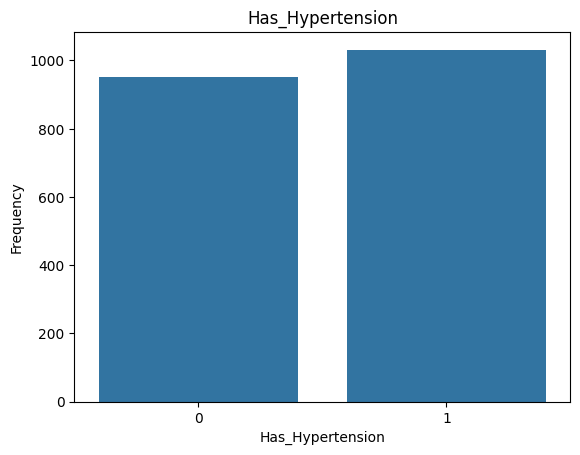

In [ ]:
sns.countplot(x = 'Has_Hypertension', data = df)
plt.title('Has_Hypertension')
plt.xlabel('Has_Hypertension')
plt.ylabel('Frequency')
plt.show()

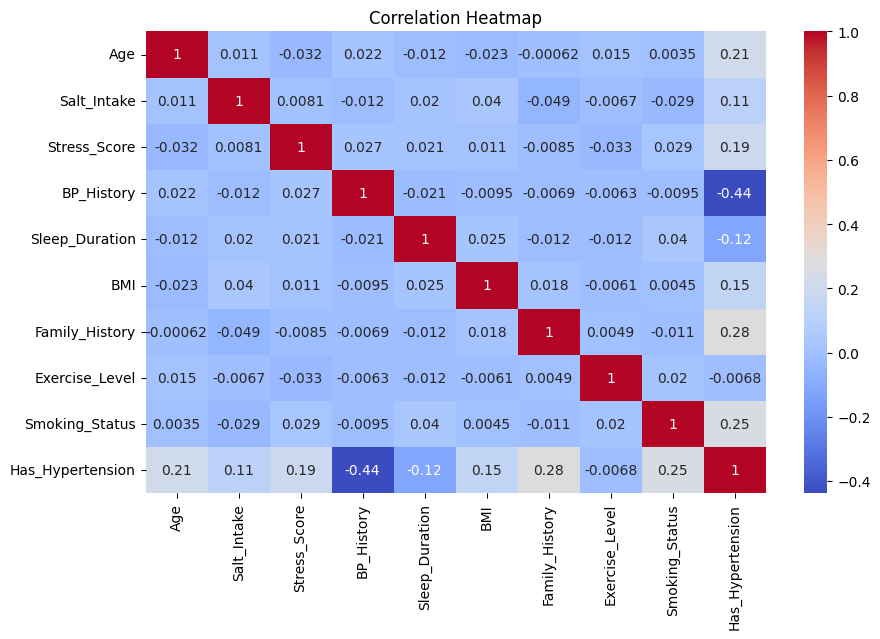

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = df.drop(['Has_Hypertension'] , axis = 1)
y = df['Has_Hypertension']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
lr = LogisticRegression(max_iter=250)
lr.fit(x_train, y_train)
y_pred_lr_test = lr.predict(x_test)
y_pred_lr_train = lr.predict(x_train)

print('test accuracy',accuracy_score(y_test,y_pred_lr_test))
print(classification_report(y_test, y_pred_lr_test))

test accuracy 0.8161209068010076
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       192
           1       0.81      0.84      0.82       205

    accuracy                           0.82       397
   macro avg       0.82      0.82      0.82       397
weighted avg       0.82      0.82      0.82       397



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    max_samples=0.3,
    bootstrap=True,
    random_state=42
)
bag.fit(x_train, y_train)
y_pred_bag_test = bag.predict(x_test)
y_pred_bag_train = bag.predict(x_train)

print('test accuracy',accuracy_score(y_test,y_pred_bag_test))
print(classification_report(y_test, y_pred_bag_test))

test accuracy 0.9219143576826196
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       192
           1       0.96      0.88      0.92       205

    accuracy                           0.92       397
   macro avg       0.92      0.92      0.92       397
weighted avg       0.93      0.92      0.92       397



In [ ]:
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(x_train, y_train)
y_pred_knn_test = knn.predict(x_test)
y_pred_knn_train = knn.predict(x_train)

print('test accuracy',accuracy_score(y_test,y_pred_knn_test))
print(classification_report(y_test, y_pred_knn_test))

test accuracy 0.8740554156171285
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       192
           1       0.92      0.82      0.87       205

    accuracy                           0.87       397
   macro avg       0.88      0.88      0.87       397
weighted avg       0.88      0.87      0.87       397



In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4,5],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

clf = DecisionTreeClassifier(random_state=42)
grid_shearch = GridSearchCV(clf, param_grid, cv=5 , scoring='accuracy',n_jobs=-1)
grid_shearch.fit(x_train, y_train)
print('best parameters',grid_shearch.best_params_)

best_clf = grid_shearch.best_estimator_
y_pred = best_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'test Accuracy with best mobel:{accuracy:.2%}' )



y_train_pred = best_clf.predict(x_train)
y_test_pred = best_clf.predict(x_test)

print('test accuracy',accuracy_score(y_test,y_test_pred))
print(classification_report(y_test, y_test_pred))

best parameters {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
test Accuracy with best mobel:97.73%
test accuracy 0.9773299748110831
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       192
           1       0.97      0.99      0.98       205

    accuracy                           0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397



In [ ]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf_test = rf.predict(x_test)
y_pred_rf_train = rf.predict(x_train)

print('test accuracy',accuracy_score(y_test,y_pred_rf_test))
print(classification_report(y_test, y_pred_rf_test))

test accuracy 0.964735516372796
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       192
           1       0.98      0.96      0.97       205

    accuracy                           0.96       397
   macro avg       0.96      0.97      0.96       397
weighted avg       0.96      0.96      0.96       397



In [ ]:
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_model.fit(x_train, y_train)


y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)


print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.8942065491183879
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       192
           1       0.90      0.89      0.90       205

    accuracy                           0.89       397
   macro avg       0.89      0.89      0.89       397
weighted avg       0.89      0.89      0.89       397



In [ ]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.4,
    max_depth=7,
    subsample=0.1,
    colsample_bytree=0.2,
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(x_train, y_train)
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

XGBoost Test Accuracy: 0.9093198992443325
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       192
           1       0.95      0.87      0.91       205

    accuracy                           0.91       397
   macro avg       0.91      0.91      0.91       397
weighted avg       0.91      0.91      0.91       397



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb_test = nb.predict(x_test)
y_pred_nb_train = nb.predict(x_train)

print('test accuracy',accuracy_score(y_test,y_pred_nb_test))
print(classification_report(y_test, y_pred_nb_test))

test accuracy 0.8513853904282116
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       192
           1       0.83      0.89      0.86       205

    accuracy                           0.85       397
   macro avg       0.85      0.85      0.85       397
weighted avg       0.85      0.85      0.85       397



In [ ]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=5, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_train, kmeans.labels_)
print(f"Silhouette Score :", silhouette_avg)

Silhouette Score : 0.09725625976525257


In [ ]:
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

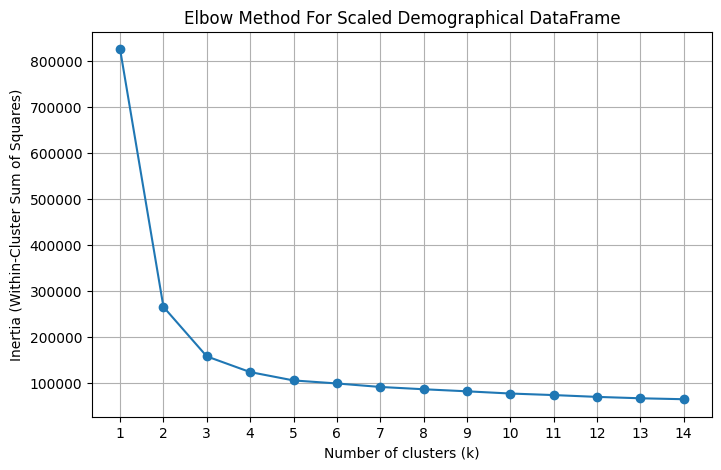

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Scaled Demographical DataFrame')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_train)
silhouette_avg = silhouette_score(x_train, kmeans.labels_)
print(f"Silhouette Score :", silhouette_avg)

Silhouette Score : 0.09755044203023297


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_train)
silhouette_avg = silhouette_score(x_train, kmeans.labels_)
print(f"Silhouette Score :", silhouette_avg)

Silhouette Score : 0.13584688029033307


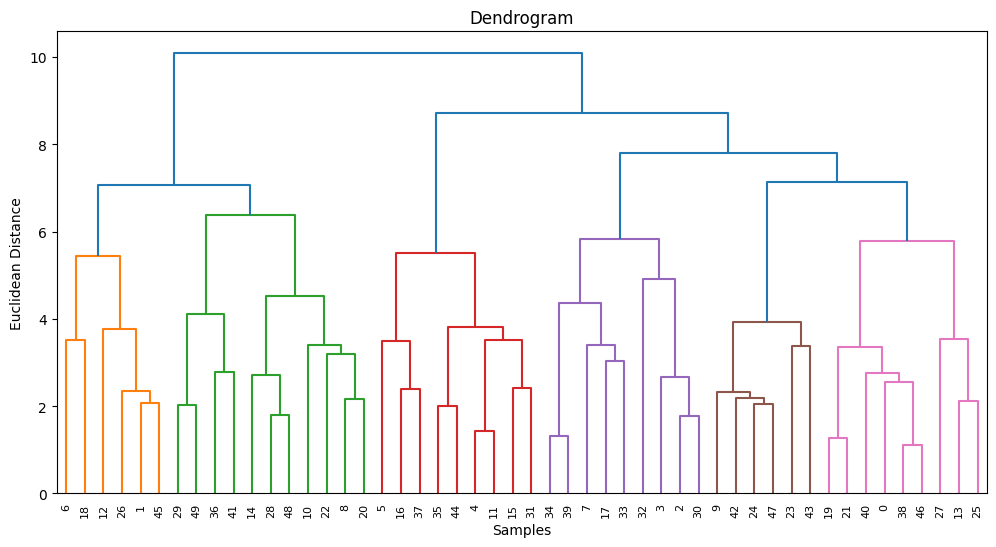

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np

sample_size = 50

sample_indices = np.random.choice(x_train.shape[0], size=sample_size, replace=False)
sample_data = x_train[sample_indices]

linkage_matrix = sch.linkage(sample_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(150, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(70, activation='relu'),
    Dropout(0.3),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"train_accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"val_accuracy: {history.history['val_accuracy'][-1]:.4f}")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6922 - loss: 0.6026 - val_accuracy: 0.8237 - val_loss: 0.3839
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8308 - loss: 0.3780 - val_accuracy: 0.8388 - val_loss: 0.3443
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.3556 - val_accuracy: 0.8438 - val_loss: 0.3292
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8624 - loss: 0.3219 - val_accuracy: 0.8690 - val_loss: 0.3002
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.3193 - val_accuracy: 0.8665 - val_loss: 0.2899
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.2805 - val_accuracy: 0.8791 - val_loss: 0.2803
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 0.2707 - val_accuracy: 0.8791 - val_loss: 0.2645
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8872 - loss: 0.2580 - val_accuracy: 0.8791 - val_loss: 0.2598
Epo